# Naive Bayes

Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. There is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. For example, a fruit may be considered to be an apple if it is red, round, and about 10 cm in diameter. A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.

<h1><center>$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$</center></h1>


## Conditional Likelihood

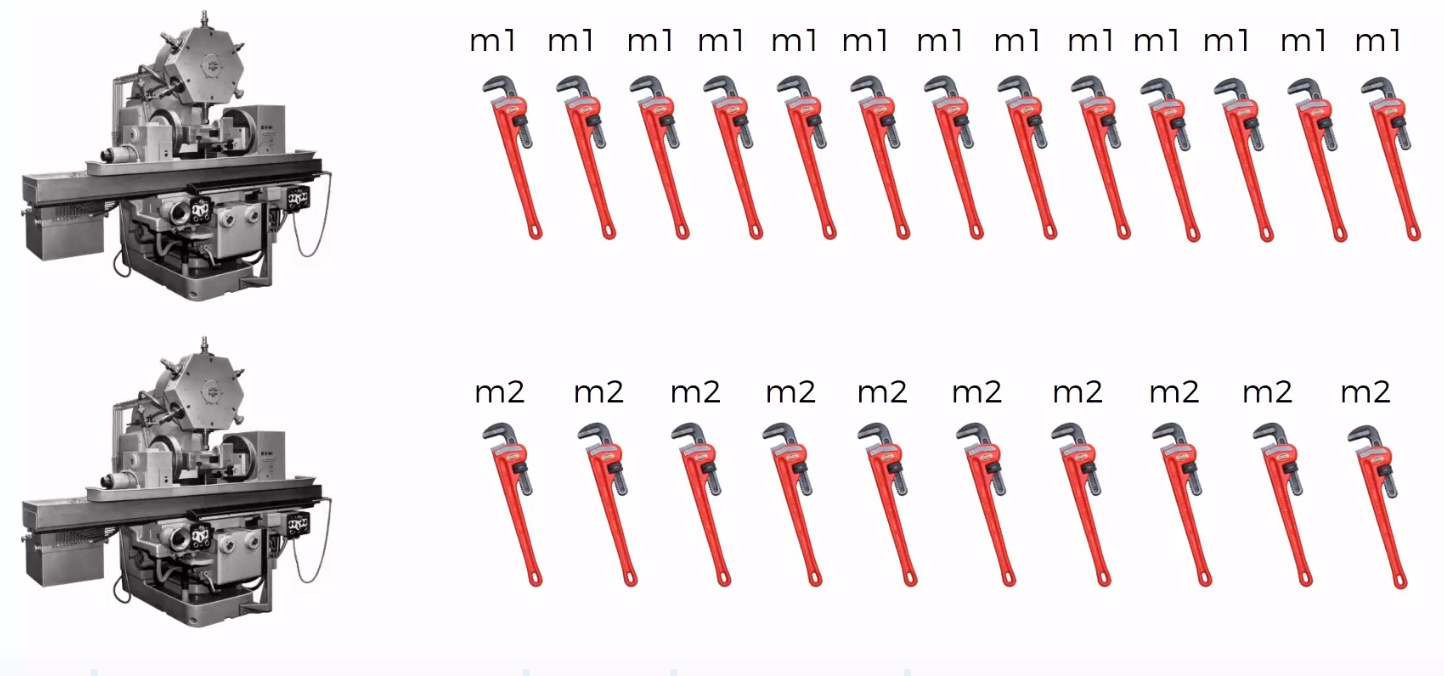

#### *Mach1:* 30 wrenches/hr 
#### *Mach2:* 20 wrenches/hr 
#### Out of all produced parts:
##### 1% are defective
#### Out of all defective parts:
##### 50% came from mach1 and came from mach2

**What is the probability that a part produced by mach2 is defective?**

<h1><center>$P(Defect|Mach2)=\frac{P(Mach2|Defect)P(Defect)}{P(Mach2)}$</center></h1>

<h1><center>$P(Defect|Mach2)=\frac{(0.5)(0.01)}{(0.4)}= 0.0125$</center></h1>

## Naive Bayes Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
 X, y = make_blobs(n_samples=600, n_features=2, centers=2, random_state=42, cluster_std=3)

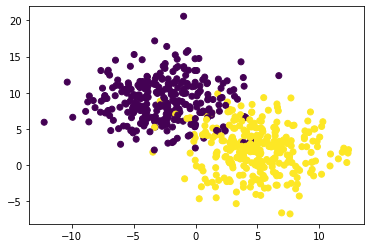

In [3]:
plt.scatter(X.T[0], X.T[1], c=y)

In [4]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [8]:
from sklearn.naive_bayes import GaussianNB

In [9]:
classifier = GaussianNB()

In [10]:
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [13]:
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm)

,0,1
0,67,5
1,0,48


In [14]:
precision_score(y_test, y_pred)

0.9056603773584906

In [15]:
recall_score(y_test, y_pred)

1.0

In [16]:
f1_score(y_test, y_pred)

0.9504950495049505

In [17]:
cv = cross_validate(classifier, X, y, cv=10, return_train_score=True)

In [18]:
cv["train_score"].mean()

0.9548148148148149

In [19]:
cv["test_score"].mean()

0.9549999999999998

In [20]:
classifier = RandomForestClassifier(max_depth=5, n_estimators=5000)


In [21]:
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
y_pred = classifier.predict(X_test)

In [ ]:
cv = cross_validate(classifier, X, y, cv=10, return_train_score=True)

In [23]:
cv["train_score"].mean()

0.9548148148148149

In [24]:
cv["test_score"].mean()

0.9549999999999998